# Prova 2

### Importação de bibliotecas

In [1]:
import numpy as np
import sympy as sy

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

<hr>

## Implementações

### Eliminação de Gauss

In [2]:
# Retorna o indice da linha que contêm o pivô
def find_pivot(m, i):
	r = m[0][i]
	idx = 0
	for l in range(1, len(m)):
		if m[l][i] > r:
			r = m[l][i]
			idx = l
	return idx

def gauss_elimination(eq_matrix):
    result = np.zeros(len(eq_matrix[0])-1)

    for j in range(len(eq_matrix[0])-2):
        pivot = find_pivot(eq_matrix, j)

        if pivot and pivot != j:
            eq_matrix[[j,pivot]] = eq_matrix[[pivot,j]]

        for i in range(j+1, len(eq_matrix)):
            m = eq_matrix[i][j]/eq_matrix[j][j]
            eq_matrix[i] -= m*eq_matrix[j]
            
    for i in range(len(result)-1, -1, -1):
        result[i] = eq_matrix[i][-1]
        for j in range(i+1, len(result)):
            result[i] -= eq_matrix[i][j]*result[j]
        result[i] /= eq_matrix[i][i]

    return result
    

### Critério das Linhas

In [3]:
def line_criteria(eq_matrix):
    alphas = np.zeros(len(eq_matrix))

    for i in range(len(eq_matrix)):
        for j in range(len(eq_matrix[i])-1):
            if i == j:
                continue
            alphas[i] += abs(eq_matrix[i][j])
        alphas[i] /= abs(eq_matrix[i][i])

    for i in range(len(alphas)):
        print(f'α_{i+1} = {alphas[i]}')
    return max(alphas) < 1

### Método Gauss-Seidel

In [4]:
def stop_criteria(current, old, epsilon):
    return (abs(max(current - old, key=abs))/abs(max(current, key=abs))) < epsilon

def gauss_seidel(eq_matrix, n = -2, epsilon=1e-4):
    result = np.zeros(len(eq_matrix))

    while n > 0 or n == -2:
        old = result.copy()
        for i in range(len(eq_matrix)):
            x = eq_matrix[i][-1]
            for j in range(len(eq_matrix[i])-1):
                if i == j:
                    continue
                x -= eq_matrix[i][j]*result[j]
            result[i] = x/eq_matrix[i][i]

        print(result)
        if stop_criteria(result, old, epsilon):
            break
        n -= 1 if n != -2 else 0

    return result

### Interpolação por Lagrange

In [5]:
def langrage_interpolation(val: list, x):
    l = [1] * len(val)
    polynomial = 0

    for i in range(len(val)):
        for j in range(len(val)):
            if i == j:
                continue
            l[i] *= (x - val[j][0])/(val[i][0] - val[j][0])

        polynomial += val[i][1]*l[i]

    return polynomial, l

### Interpolação por Newton

In [6]:
def newton_interpolation(val: list, x):
    table = np.zeros((len(val), len(val)))
    polynomial = 0

    # Inserindo os valores de f na tabela
    for i in range(len(val)):
        table[i][0] = val[i][1]

    # Calculando cada elemento da tabela
    for j in range(1, len(val)):
        for i in range(len(val)-j):
            table[i][j] = (table[i+1][j-1] - table[i][j-1])/(val[i+j][0] - val[i][0])

    # Montando o polinômio
    multiplier = 1
    for j in range(len(table)):
        polynomial += table[0][j]*multiplier
        multiplier *= (x-val[j][0])

    return polynomial, table

<hr>

## Questão 1

Um escritório de engenharia civil foi solicitado a projetar uma sala de cinema cuja sustentação deve ser garantida por quatro colunas principais. Para calcular as dimensões das colunas, os engenheiros chegaram ao seguinte sistema linear: **(utilize critério de linhas, critério de parada com precisão de $10^{-4}$ e o erro relativo para comparar as aproximações)**

$$
\begin{cases}
    3.21x_1 + 7.13x_2 + 4.95x_3 - 6.35x_4 = 31.07 \\
    8.05x_1 - 4.70x_2 + 5.05x_3 + 1.25x_4 = 38.13 \\
    2.02x_1 + 7.77x_2 - 3.13x_3 - 6.72x_4 = 0 \\
    0.13x_1 + 9.05x_2 - 4.77x_3 - 4.78x_4 = -20.67
 \end{cases}
$$

In [7]:
eq_sys = np.array([[3.21, 7.13,  4.95, -6.35, 31.07],
                   [8.05, -4.7,  5.05,  1.25, 38.13],
                   [2.02, 7.77, -3.13, -6.72, 0],
                   [0.13, 9.05, -4.77, -4.78, -20.67]])
epsilon = 1e-4

a) Resolva o sistema pelo **método iterativo de Gauss-Seidel**

Primeiramente, iremos realizar o teste do critério das linhas:

In [8]:
line_criteria(eq_sys)

α_1 = 5.741433021806854
α_2 = 3.0531914893617023
α_3 = 5.274760383386581
α_4 = 2.918410041841004


False

Como podemos observar, o critério das linhas não foi atendido, entretanto, ele não é necessário para haver convergência. Então, iremos prosseguir com o método de Gauss-Seidel

In [10]:
gauss_seidel(eq_sys, 300, epsilon)

[ 9.67912773  8.46531451 27.26112835 -6.58916304]
[ -64.19671747  -90.52794283 -252.01287842   82.66694021]
[ 762.90749247 1049.77530929 2920.86436096 -902.13566499]
[ -8610.80000458 -11857.95204155 -33056.78968158  10307.04744864]
[  97713.12407444  134574.37025916  375003.19766427 -116766.4907706 ]
[-1108167.3628596  -1526165.39708052 -4253077.44099475  1324548.42317877]
[ 12568600.0533624   17309539.73436539  48237294.07030346
 -15022305.32267858]
[-1.42549293e+08 -1.96319446e+08 -5.47093219e+08  1.70379139e+08]
[ 1.61675285e+09  2.22659863e+09  6.20497262e+09 -1.93238994e+09]
[-1.83367411e+10 -2.52534343e+10 -7.03749972e+10  2.19166066e+10]
[ 2.07969992e+11  2.86417119e+11  7.98172780e+11 -2.48571786e+11]
[-2.35873525e+12 -3.24845978e+12 -9.05264387e+12  2.81922901e+12]
[ 2.67520902e+13  3.68430874e+13  1.02672458e+14 -3.19748766e+13]
[-3.03414438e+14 -4.17863598e+14 -1.16448120e+15  3.62649765e+14]
[ 3.44123844e+15  4.73928757e+15  1.32072076e+16 -4.11306831e+15]
[-3.90295270e+16 

/tmp/ipykernel_36226/45938033.py:14: RuntimeWarning: overflow encountered in double_scalars
  x -= eq_matrix[i][j]*result[j]
/tmp/ipykernel_36226/45938033.py:14: RuntimeWarning: invalid value encountered in double_scalars
  x -= eq_matrix[i][j]*result[j]
/tmp/ipykernel_36226/45938033.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return (abs(max(current - old, key=abs))/abs(max(current, key=abs))) < epsilon


array([nan, nan, nan, nan])

O resultado, juntamente com o critério das linhas, nos mostra que esse problema não é possível de ser resolvido através do método de Gauss-Seidel, visto que não converge

b) Resolva o sistema por algum método direto e encontre a solução exata

In [11]:
result = gauss_elimination(eq_sys)
for i in range(len(result)):
    print(f'x_{i+1} = {result[i]}')

x_1 = 1.5816174394200244
x_2 = -2.6834568240471253
x_3 = 3.5968362461222747
x_4 = -4.302632402616136


c) Para as dez primeiras iterações **calcule o erro relativo** comparando o **vetor da solução aproximada** (obtido nas iterações do item *a* **com o vetor do valor exato** (obtido no item *b*).

In [12]:
# Resultados obtidos nas 10 primeiras iterações
iteration_results = [[ 9.67912773,  8.46531451, 27.26112835, -6.58916304],
                    [ -64.19671747,  -90.52794283, -252.01287842,   82.66694021],
                    [ 762.90749247, 1049.77530929, 2920.86436096, -902.13566499],
                    [ -8610.80000458, -11857.95204155, -33056.78968158,  10307.04744864],
                    [  97713.12407444,  134574.37025916,  375003.19766427, -116766.4907706 ],
                    [-1108167.3628596,  -1526165.39708052, -4253077.44099475,  1324548.42317877],
                    [ 12568600.0533624,   17309539.73436539,  48237294.07030346, -15022305.32267858],
                    [-1.42549293e+08, -1.96319446e+08, -5.47093219e+08,  1.70379139e+08],
                    [ 1.61675285e+09,  2.22659863e+09,  6.20497262e+09, -1.93238994e+09],
                    [-1.83367411e+10, -2.52534343e+10, -7.03749972e+10,  2.19166066e+10]]
distances = [ir-result for ir in iteration_results]
err = [abs(max(distance, key=abs)/result[3]) for distance in distances]

In [13]:
for i in range(10):
    print(f'E_relativo_{i+1} = {err[i]}')

E_relativo_1 = 5.499956744965963
E_relativo_2 = 59.407751057400006
E_relativo_3 = 678.0192337463194
E_relativo_4 = 7683.758086729501
E_relativo_5 = 87155.85384426806
E_relativo_6 = 988483.477055811
E_relativo_7 = 11211111.236027839
E_relativo_8 = 127153140.54349293
E_relativo_9 = 1442134032.32643
E_relativo_10 = 16356265332.08057


d) Construa o gráfico deste erro relativo obtido no item *c* versus por iteração, comente o gráfico.

Dado que o erro relativo está crescendo muito rapidamente, iremos plotar o eixo y em escala log.

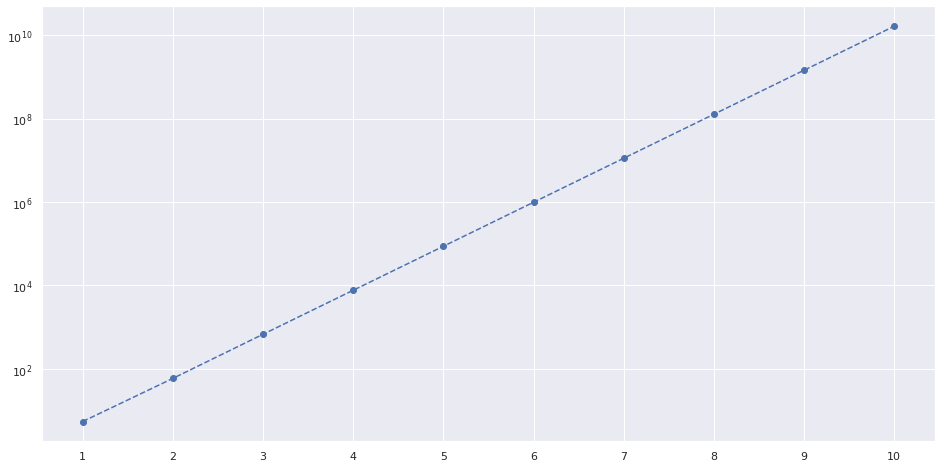

In [41]:
plt.figure(figsize=(16,8))
sns.set(style="darkgrid")
plt.xticks(list(range(1,11)))
plt.yscale('log')
plt.plot(list(range(1,11)), err, marker='o', linestyle='--')
plt.show()

Como os resultados e o critério de parada já nos indicavam: a solução não está convergindo. O gráfico só corrobora tal conclusão ao nos evidenciar que o erro relativo só cresce.

<hr>

## Questão 2

Uma fábrica de automóveis produz 3 modelos de carros A, B e C cada um deles passa por 3 setores diferentes de montagem: setor de motores, lataria e acabamento. O setor de motores
trabalha 80 horas por semana; o de lataria trabalha 60 horas por semana e o de acabamento trabalha 95 horas por semana. Sabe-se que o modelo A precisa de 3 horas no setor de motores, 2 horas no setor de lataria e 3 horas no setor de acabamento; o modelo B precisa de 2 horas no setor de motores, 2 horas no setor de lataria e 3 horas no setor de acabamento; e o modelo C precisa de 4 horas no setor de motores, 3 horas no setor de lataria e 5 horas no setor de acabamento. Responda:

Quantos carros de cada modelo a fábrica é capaz de produzir semanalmente? Resolva o sistema formado pelas equações pelo método direto de Gauss com pivoteamento;

**Resposta:**
$$
\begin{cases}
    3x_A + 2x_B + 4x_C = 80 \\
    2x_A + 2x_B + 3x_C = 60 \\
    3x_A + 3x_B + 5x_C = 95
 \end{cases}
$$

In [15]:
eq_sys = np.array([[3, 2, 4, 80],
                   [2, 2, 3, 60],
                   [3, 3, 5, 95]], float)

result = gauss_elimination(eq_sys)
for i in range(len(result)):
    print(f'x_{chr(ord("a")+i)} = {result[i]}')

x_a = 10.000000000000007
x_b = 5.000000000000009
x_c = 9.999999999999991


<hr>

## Questão 3

Para um tanque de água, são fornecidos valores de temperatura, T, em função da profundidade, P, conforme a tabela a seguir:

P (m)  |1.0   |1.5   |2.0   |2.5   |3.0   |
-------|------|------|------|------|------|
T (ºC) |66.13 |52.10 |18.03 |11.13 |10.12 |

Sabe-se que a uma determinada profundidade, $x$, a segunda derivada de T muda de sinal. O ponto que indica esta mudança é o ponto em que $\frac{d^2T}{dx^2} = 0$. Estime a profundidade deste ponto utilizando interpolação polinomial – P(T) pelo método de Lagrange **(apresente todos os polinômios de lagrange, o gráfico desses polinômios passando por cada ponto e o polinômio interpolador e seus gráficos – conforme mostrado em sala).**

**Resposta:** Vamos calcular os polinômios a partir da função ```langrage_interpolation```, definida na seção de implementações

In [16]:
x = sy.Symbol('x')
values = [(1.0, 66.13), (1.5, 52.10), (2.0, 18.03), (2.5, 11.13), (3.0, 10.12)]
polynomial, l = langrage_interpolation(values, x)

for i, p in enumerate(l):
    print(f'L_{i} = {sy.simplify(p)}')

print(f'p(x) = {sy.simplify(polynomial)}')


L_0 = (0.5*x - 1.5)*(0.666666666666667*x - 1.66666666666667)*(1.0*x - 2.0)*(2.0*x - 3.0)
L_1 = -2.66666666666667*x**4 + 22.6666666666667*x**3 - 69.3333333333333*x**2 + 89.3333333333333*x - 40.0
L_2 = 1.0*(1.0*x - 3.0)*(x - 1)*(2.0*x - 5.0)*(2.0*x - 3.0)
L_3 = -2.66666666666667*x**4 + 20.0*x**3 - 53.3333333333333*x**2 + 60.0*x - 24.0
L_4 = 0.5*(0.666666666666667*x - 1.0)*(1.0*x - 2.0)*(x - 1)*(2.0*x - 5.0)
p(x) = -45.66*x**4 + 382.566666666666*x**3 - 1133.805*x**2 + 1360.24833333333*x - 497.22


Agora, transformaremos as funções de sua representação simbólica do sympy para uma função lambda no Python, de modo que possamos usá-las para plotar os gráficos

In [17]:
lam_x = [sy.lambdify(x, li, modules=['numpy']) for li in l]
lam_p = sy.lambdify(x, polynomial, modules=['numpy'])

Para cada $L_i$, teremos:

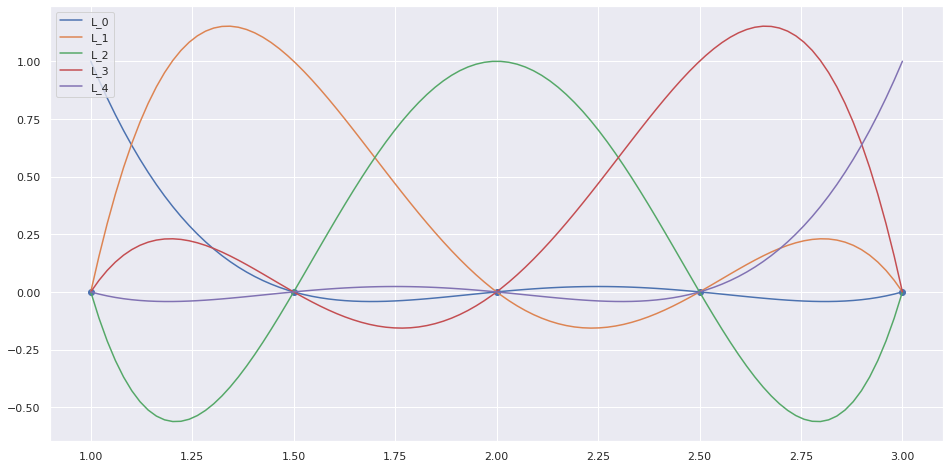

In [18]:
x_values = np.linspace(1, 3, 100)

plt.figure(figsize=(16,8))
sns.set(style="darkgrid")
plt.scatter([v[0] for v in values], np.zeros(len(values)))
for i, li in enumerate(lam_x):
    plt.plot(x_values, li(x_values), label=f'L_{i}')
plt.legend(loc="upper left")
plt.show()

Já para o polinômio interpolador $p(x)$:

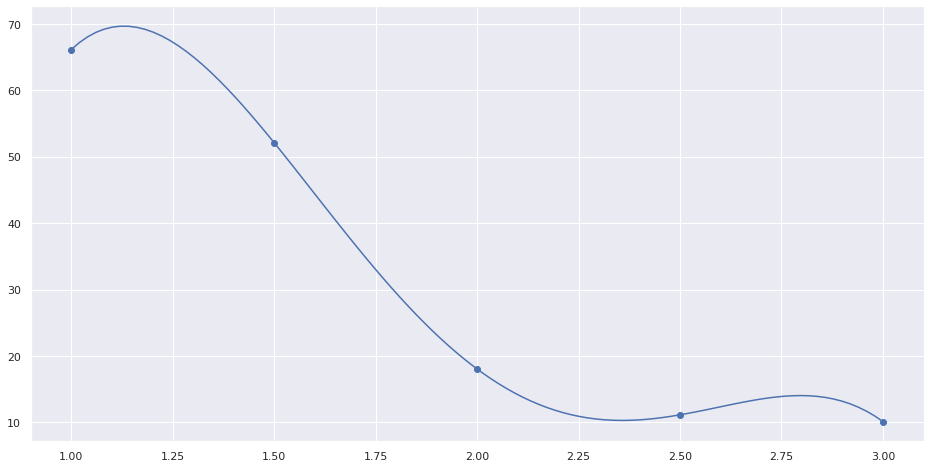

In [19]:
plt.figure(figsize=(16,8))
sns.set(style="darkgrid")
plt.scatter([v[0] for v in values], [v[1] for v in values])
plt.plot(x_values, lam_p(x_values))
plt.show()

Para a segunda derivada, a adquirimos da seguinte forma

In [20]:
d = sy.simplify(polynomial.diff(x, x))
d

-547.92*x**2 + 2295.4*x - 2267.61

Como se trata de uma equação de 2o grau, basta resolvermos por Bhaskara:

In [21]:
def bhaskara(a, b, c):
    delta_sqrt = np.sqrt(b**2 - 4*a*c)
    return (-b+delta_sqrt)/(2*a), (-b-delta_sqrt)/(2*a)

Então, há dois possíveis soluções, sendo elas:

In [22]:
bhaskara(-547.92, 2295.4, -2267.61)

(1.595674709920982, 2.5936229977735725)

<hr>

## Questão 4

Considere a função

$$f(x) = \frac{1}{1+13x^2}$$



In [23]:
def f(x):
    return 1/(1+13*x**2)

a) Encontre os **polinômios interpoladores de 2º, 4º e 8º graus com pontos igualmente espaçados** no intervalo [-1,1] pelo método de diferenças divididas (apresente a tabela de Newton e o polinômio interpolador de Newton);

**Resposta:** Vamos criar uma função para criar os pontos (x, f(x)), e então jogar para a função ```newton_interpolation```, que nos retornará o polinômio gerado e a tabela de Newton, respectivamente

In [24]:
def create_data(values):
    y = []
    for x in values:
        y.append((x, f(x)))
    return y

In [25]:
x = sy.Symbol('x')

y2 = create_data([-1, 0, 1])
y4 = create_data([-1, -0.5, 0, 0.5, 1])
y8 = create_data([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])

In [26]:
p2, t2 =  newton_interpolation(y2, x)
p4, t4 =  newton_interpolation(y4, x)
p8, t8 =  newton_interpolation(y8, x)

#### Polinômio 2º grau

In [27]:
p2.simplify()

1.0 - 0.928571428571429*x**2

In [28]:
pd.DataFrame(t2, columns=['f(x)', *[f'Δ{i}f' for i in range(1,3)]])

,f(x),Δ1f,Δ2f
0,0.071429,0.928571,-0.928571
1,1.000000,-0.928571,0.000000
2,0.071429,0.000000,0.000000


#### Polinômio 4º grau

In [29]:
p4.simplify()

2.84033613445378*x**4 - 3.76890756302521*x**2 - 1.11022302462516e-16*x + 1.0

In [30]:
pd.DataFrame(t4, columns=['f(x)', *[f'Δ{i}f' for i in range(1,5)]])

,f(x),Δ1f,Δ2f,Δ3f,Δ4f
0,0.071429,0.327731,1.201681,-2.840336,2.840336
1,0.235294,1.529412,-3.058824,2.840336,0.000000
2,1.000000,-1.529412,1.201681,0.000000,0.000000
3,0.235294,-0.327731,0.000000,0.000000,0.000000
4,0.071429,0.000000,0.000000,0.000000,0.000000


#### Polinômio 8º grau

In [31]:
p8.simplify()

31.8600732489003*x**8 - 62.1884122069881*x**6 + 38.7595052540072*x**4 - 8.88178419700125e-16*x**3 - 9.35973772449088*x**2 + 1.11022302462516e-16*x + 1.0

In [32]:
pd.DataFrame(t8, columns=['f(x)', *[f'Δ{i}f' for i in range(1,9)]])

,f(x),Δ1f,Δ2f,Δ3f,Δ4f,Δ5f,Δ6f,Δ7f,Δ8f
0,0.071429,0.195489,0.528969,1.443365,-2.185667,-6.433284,21.444280,-31.860073,31.860073
1,0.120301,0.459973,1.611493,-0.742302,-10.227272,25.733136,-34.310848,31.860073,0.000000
2,0.235294,1.265720,1.054767,-10.969574,21.939148,-25.733136,21.444280,0.000000,0.000000
3,0.551724,1.793103,-7.172414,10.969574,-10.227272,6.433284,0.000000,0.000000,0.000000
4,1.000000,-1.793103,1.054767,0.742302,-2.185667,0.000000,0.000000,0.000000,0.000000
5,0.551724,-1.265720,1.611493,-1.443365,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.235294,-0.459973,0.528969,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.120301,-0.195489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


b) Construa e comente o gráfico da função f(x) e de cada polinômio interpolador.

In [33]:
x_values = np.linspace(-1, 1, 500)

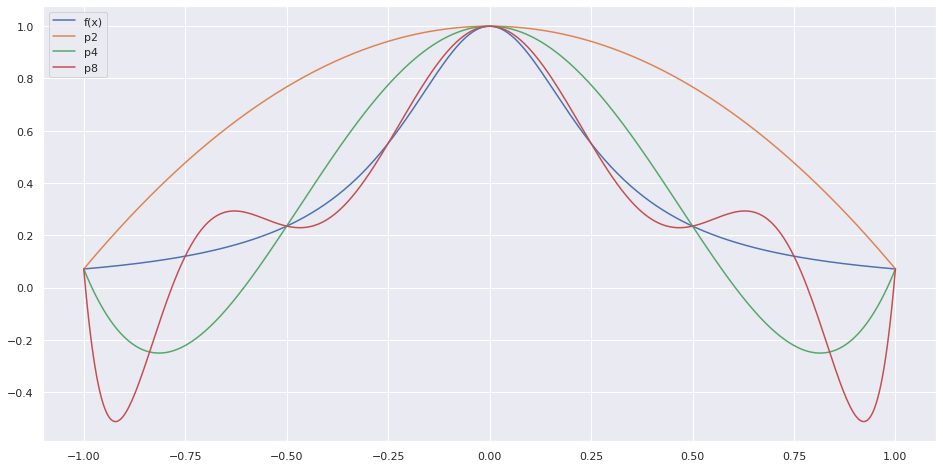

In [34]:
plt.figure(figsize=(16,8))
sns.set(style="darkgrid")
plt.plot(x_values, f(x_values), label='f(x)')
plt.plot(x_values, sy.lambdify(x, p2, modules=['numpy'])(x_values), label='p2')
plt.plot(x_values, sy.lambdify(x, p4, modules=['numpy'])(x_values), label='p4')
plt.plot(x_values, sy.lambdify(x, p8, modules=['numpy'])(x_values), label='p8')
plt.legend(loc="upper left")
plt.show()

Fica perceptível, no gráfico, que os polinômios acertam mais precisamente nos pontos exatos que lhe foram fornecidos, tornando-se gradativamente mais imprecisos à medida que se distanciam de tais pontos. Também é possível observar que quanto maior a quantidade de dados –e por consequência, quanto maior o grau– maior é a precisão do polinômio.

c) Calcule f (0.5) e compare com os valores encontrados pelas aproximações através de cada polinômio interpolador.

In [35]:
print(f'f(0.5) = {f(0.5)}')
print(f'p2(0.5) = {p2.subs(x, 0.5).evalf()}')
print(f'p4(0.5) = {p4.subs(x, 0.5).evalf()}')
print(f'p8(0.5) = {p8.subs(x, 0.5).evalf()}')

f(0.5) = 0.23529411764705882
p2(0.5) = 0.767857142857143
p4(0.5) = 0.235294117647058
p8(0.5) = 0.235294117647058


Como o polinômio de grau 2 (p2) foi o único a não receber o valor de f(x) em 0.5, acabou por ser o único a ter um valor divergente em relação ao esperado. Enquanto isso, p2 e p8 geraram valores idênticos ao da função.